# Task 1 - Titanic  SURVIVAL PREDICTION

### # Problem Statement
- Use the Titanic dataset to build a model that predicts whether a
  passenger on the Titanic survived or not. This is a classic beginner
  project with readily available data.
- It is a Classification problem

### # Data dictinoary

- PassengerId : Passenger number
- Survived : 0 = Dead 1 = Alive
- Pclass : 1 = First class 2 = Second class 3 = Third class
- Name : Name of passenger
- Sex : Gender
- Age : Age of passenger
- SibSp : Number of Siblings/Spouses Aboard. parch. Number of Parents/Children Aboard
- Parch : Number of Parents/Children Aboard. ticket. Ticket Number
- Ticket : Ticket number
- Fare : Passenger fare
- Cabin : Cabin number
- Embarked : Embarked implies where the traveler mounted from. 
    There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.

### # Importing library

In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows' , None)

### # Importing dataset

In [307]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### # Understanding data

In [308]:
df.shape

(418, 12)

In [309]:
# 0 = not survived 1 = survived

df.Survived.value_counts(normalize = True) # bit imbalanced data

0    0.636364
1    0.363636
Name: Survived, dtype: float64

In [310]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [312]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### # Data cleaning

In [313]:
df.isna().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

###### Age

In [314]:
#we fill age column

df['Age'].fillna(df['Age'].mean() , inplace = True)

###### Fare

In [315]:
df.dropna(subset=['Fare'] , inplace = True)

###### Cabin 

In [316]:
# we will drop cabin beacuse it has a lot null values

df.drop('Cabin' , axis = 1 , inplace = True)

###### Dropping unuesful column

In [317]:
df.drop(['PassengerId' ,'Name' ,  'Age','SibSp','Ticket'] , axis = 1 , inplace = True)

In [318]:
df.isna().sum()  # no null values

Survived    0
Pclass      0
Sex         0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [319]:
# seprating categorical and numerical data

cat_var = ['Pclass', 'Sex',  'Parch', 'Embarked']
num_var = [ 'Fare']

### # EDA

<Axes: xlabel='Survived', ylabel='count'>

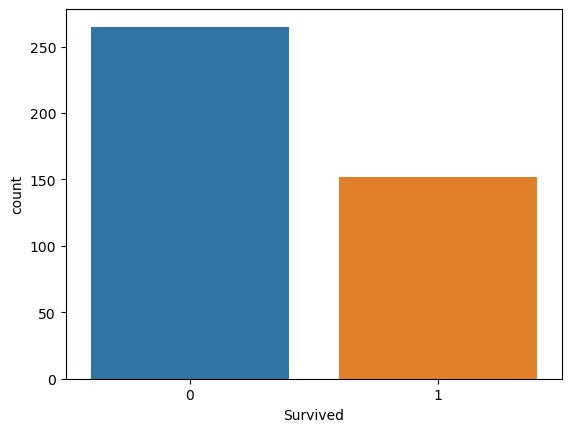

In [320]:
sns.countplot(x=df['Survived'])

- More died in this incident

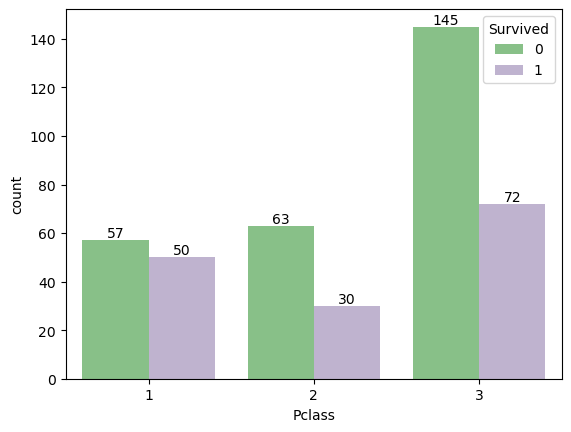

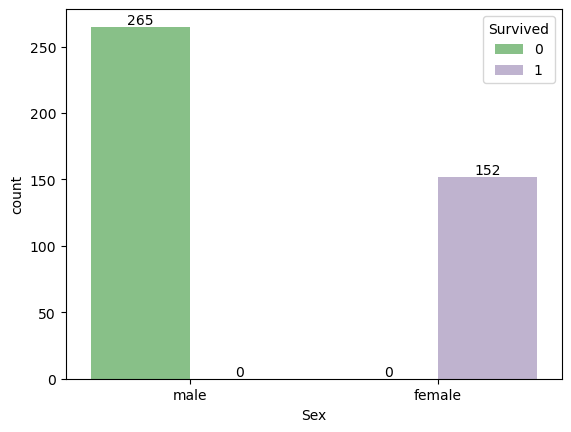

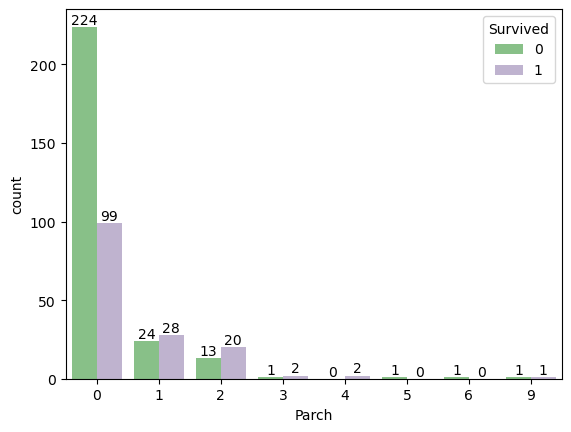

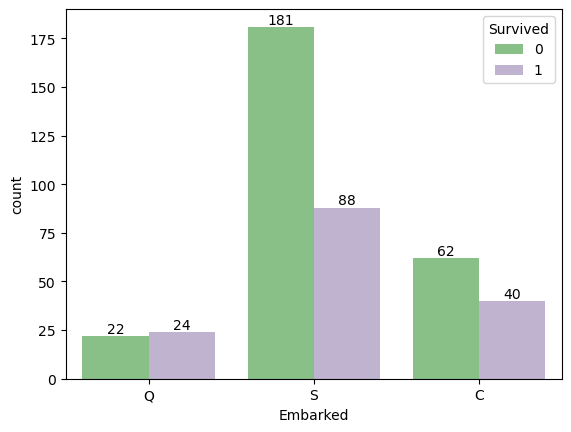

In [321]:
for column in cat_var :
    plt.subplot((111))
    ax = sns.countplot(x=column, data=df, hue='Survived', palette='Accent')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()


### Insights
- People in pclass - 3rd class people died the most
- female survived more than male 

### Checking correlation

C:\Users\DELL\AppData\Local\Temp\ipykernel_14016\2475276788.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot = True , cmap='coolwarm')


<Axes: >

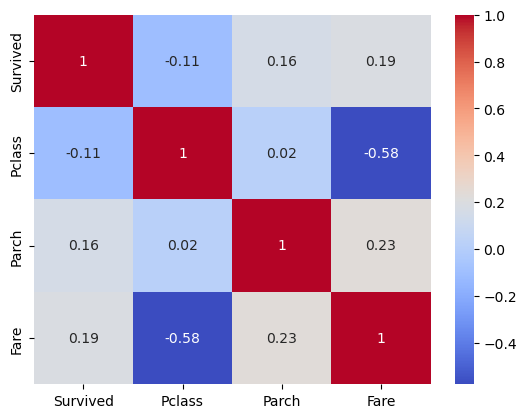

In [322]:
sns.heatmap(df.corr() , annot = True , cmap='coolwarm')

######
- There is no hight correlation of survived between passengerid , age , sibsp 
- so we will drop it

### Data preprocessing

In [323]:
df.head()

,Survived,Pclass,Sex,Parch,Fare,Embarked
0,0,3,male,0,7.8292,Q
1,1,3,female,0,7.0000,S
2,0,2,male,0,9.6875,Q
3,0,3,male,0,8.6625,S
4,1,3,female,1,12.2875,S


In [324]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Parch         8
Fare        169
Embarked      3
dtype: int64

### Label Encoding
- Sex and embarked

In [325]:
from sklearn.preprocessing import LabelEncoder

In [326]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])       # sex
df['Embarked'] = le.fit_transform(df['Embarked'])  # embarked

In [327]:
df.head()

,Survived,Pclass,Sex,Parch,Fare,Embarked
0,0,3,1,0,7.8292,1
1,1,3,0,0,7.0000,2
2,0,2,1,0,9.6875,1
3,0,3,1,0,8.6625,2
4,1,3,0,1,12.2875,2


### Extract target and features

In [328]:
x = df.drop('Survived' , axis = 1)  # features
y = df['Survived']               # target

In [330]:
# treating imbalnced data

from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state = 30)
x_balanced, y_balanced = smote.fit_resample(x , y )

### Split data into train and test

In [331]:
from sklearn.model_selection import train_test_split

In [332]:
x_train,x_test,y_train,y_test = train_test_split(x_balanced , y_balanced , test_size = 0.2 , random_state = 42)

### Model training using Logistic regression

In [333]:
from sklearn.linear_model import LogisticRegression

In [334]:
lr = LogisticRegression()
lr.fit(x_balanced , y_balanced)

LogisticRegression()

### Evaluate model

In [335]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [336]:
y_pred_test # predicted 

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [337]:
np.array(y_test)  # actual value

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [338]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [339]:
accuracy_score(y_train , y_pred_train)  # training score

1.0

In [340]:
accuracy_score(y_test , y_pred_test)   # testing score

1.0

In [286]:
print(confusion_matrix(y_test,y_pred_test))  

[[55  0]
 [ 0 51]]


In [288]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        51

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



### Model testing

In [289]:
- 0 = not survived
- 1 = survived

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [302]:
# creating new dataframe to check

data = {'Pclass' :[3] , 'Sex' : [1] , 'Parch' : [0] ,'Fare' : [7.8292] , 'Embarked' : [0] }
df1= pd.DataFrame(data)
df1

,Pclass,Sex,Parch,Fare,Embarked
0,3,1,0,7.8292,0


In [341]:
pred_survived = lr.predict(df1)
print(pred_survived)

[0]
